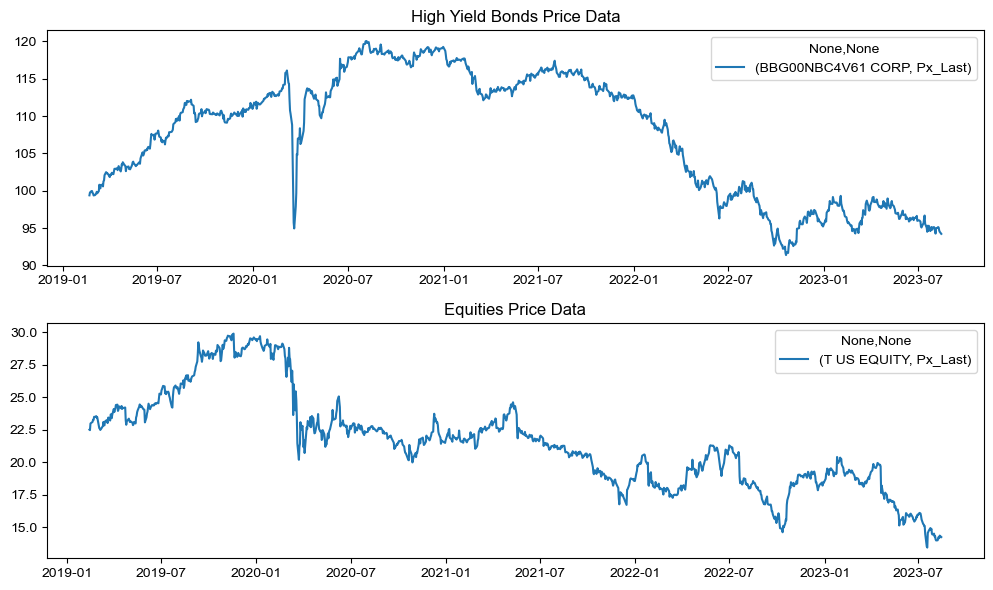

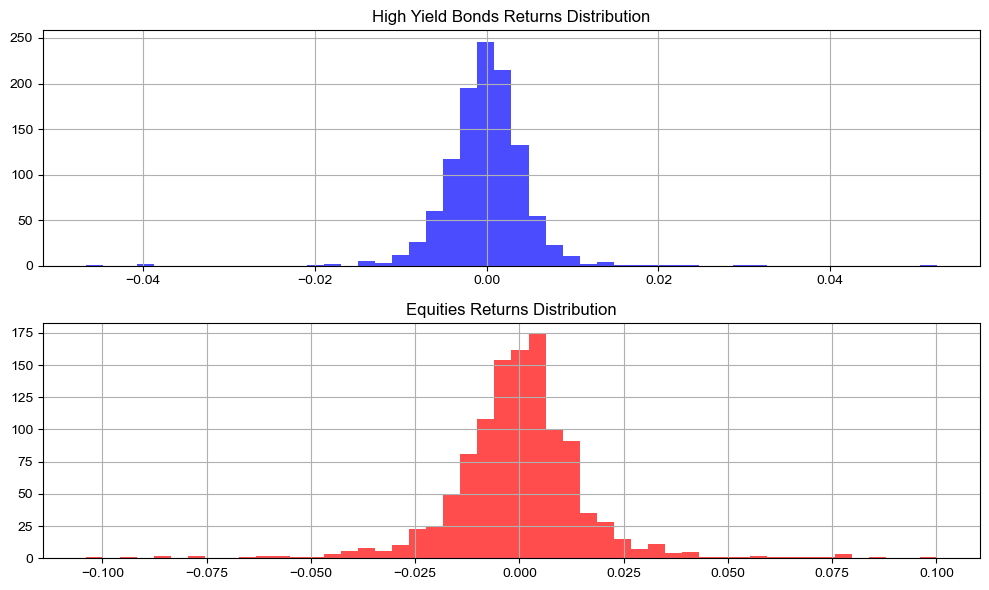

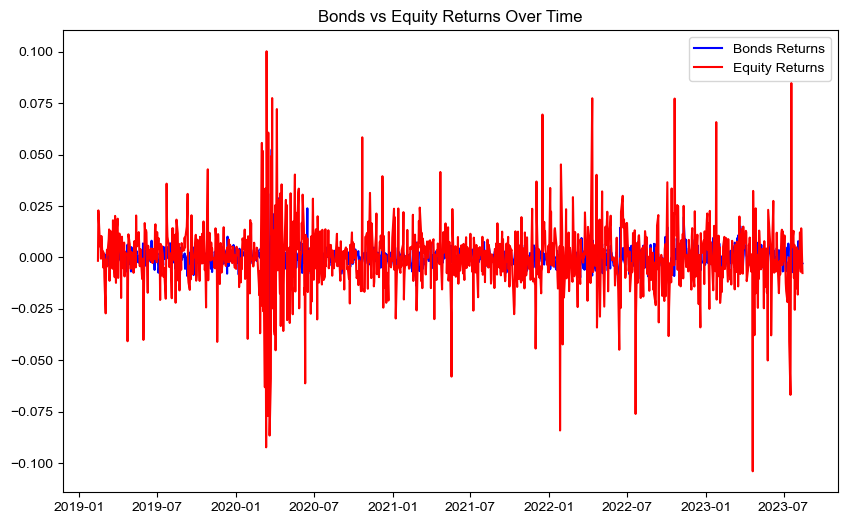

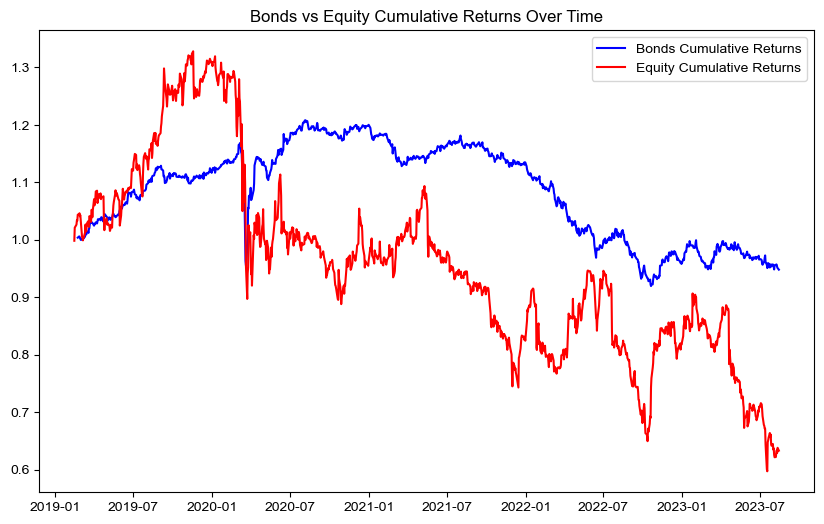

Bonds Returns Stats:
      BBG00NBC4V61 CORP
                Px_Last
count       1121.000000
mean          -0.000034
std            0.005158
min           -0.046695
25%           -0.002380
50%            0.000107
75%            0.002413
max            0.052472

Equity Returns Stats:
       T US EQUITY
           Px_Last
count  1132.000000
mean     -0.000261
std       0.016883
min      -0.104061
25%      -0.007655
50%       0.000260
75%       0.006999
max       0.100224


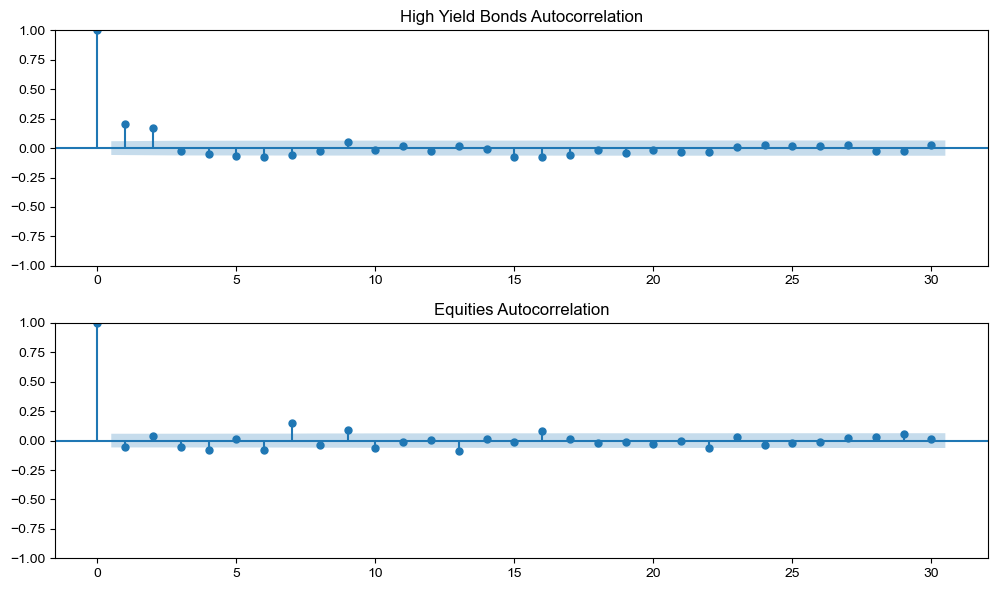

In [32]:
from xbbg import blp
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime, timedelta

# Symbols for high yield bonds and equities
bond_symbol = 'BBG00NBC4V61 CORP'
equity_symbol = 'T US EQUITY'

dates=blp.bdp(tickers=bond_symbol, flds=['SECURITY_PRICING_DATE','LAST_UPDATE_DT'])

start_date = dates['security_pricing_date'].iloc[0]
end_date = dates['last_update_dt'].iloc[0]

# Function to fetch data using bdh
def fetch_data(symbols, start_date, end_date):
    return blp.bdh(tickers=symbols, flds=['Px_Last'], start_date=start_date, end_date=end_date)

# Fetch data for bonds and equities
bonds_data = fetch_data(bond_symbol, start_date, end_date)
equity_data = fetch_data(equity_symbol, start_date, end_date)

# Calculate returns
bonds_returns = bonds_data.pct_change().dropna()
equity_returns = equity_data.pct_change().dropna()

# Visualizing Time Series Data
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["font.family"] = "Arial"  # or another available font

fig, ax = plt.subplots(2, 1, figsize=(10, 6))

bonds_data.plot(ax=ax[0], title="High Yield Bonds Price Data")
equity_data.plot(ax=ax[1], title="Equities Price Data")
plt.tight_layout()
plt.show()

# Histogram of Returns
fig, ax = plt.subplots(2, 1, figsize=(10, 6))

bonds_returns.hist(bins=50, ax=ax[0], color='blue', alpha=0.7)
ax[0].set_title("High Yield Bonds Returns Distribution")

equity_returns.hist(bins=50, ax=ax[1], color='red', alpha=0.7)
ax[1].set_title("Equities Returns Distribution")
plt.tight_layout()
plt.show()

# Extracting the rolling correlation between the two series
# corr_series = rolling_corr[('BBG00NBC4V61 CORP', 'Px_Last')]

# # Plotting
# plt.figure(figsize=(12, 6))
# corr_series.plot()
# plt.title("Rolling Correlation Between BBG00NBC4V61 CORP and T US EQUITY")
# plt.ylabel("Correlation")
# plt.xlabel("Date")
# plt.axhline(0, color='gray', linestyle='--')
# plt.tight_layout()
# plt.grid(True)
# plt.show()

plt.figure(figsize=(10,6))
plt.plot(bonds_returns, label='Bonds Returns', color='blue')
plt.plot(equity_returns, label='Equity Returns', color='red')
plt.legend()
plt.title('Bonds vs Equity Returns Over Time')
plt.show()

bonds_cumulative = (1 + bonds_returns).cumprod()
equity_cumulative = (1 + equity_returns).cumprod()

plt.figure(figsize=(10,6))
plt.plot(bonds_cumulative, label='Bonds Cumulative Returns', color='blue')
plt.plot(equity_cumulative, label='Equity Cumulative Returns', color='red')
plt.legend()
plt.title('Bonds vs Equity Cumulative Returns Over Time')
plt.show()


print("Bonds Returns Stats:")
print(bonds_returns.describe())
print("\nEquity Returns Stats:")
print(equity_returns.describe())

# Autocorrelation Plots
fig, ax = plt.subplots(2, 1, figsize=(10, 6))

sm.graphics.tsa.plot_acf(bonds_returns.dropna(), ax=ax[0], lags=30, title="High Yield Bonds Autocorrelation")
sm.graphics.tsa.plot_acf(equity_returns.dropna(), ax=ax[1], lags=30, title="Equities Autocorrelation")
plt.tight_layout()
plt.show()


